### FrisPy Test Notebook:

This is a trial notebook to work out how to help Robert R access the tools in frispy successfully and plot the path of said frisbee.

### Dependencies

These are the typical dependencies I need. Not sure whether I need numpy at this point but no loss in having it available.

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import frispy

### Initial Frisbee Conditions:

This array \[str,float\] defines the initial conditions for the frisbee. The default initial conditions are 

```
initCond = {
            "x": 0,
            "y": 0,
            "z": 1.,
            "vx": 10.0,
            "vy": 0,
            "vz": 0,
            "phi": 0,
            "theta": 0,
            "gamma": 0,
            "dphi": 0,
            "dtheta": 0,
            "dgamma": 62.0,
        }
```
#### Needed Still

I need to clarify what all the angular variables are at the end. The first 6 are pretty clear bout after that I'm confused. Could just make a bunch of plots and try to figure it out. Easier, probably, to go read the code:)

In [96]:
initCond = {
            "x": 0,
            "y": 2,
            "z": 1.5,
            "vx": 10.0,
            "vy": 5.,
            "vz": 0,
            "phi": 0,
            "theta": 0,
            "gamma": 0,
            "dphi": 0,
            "dtheta": 0,
            "dgamma": 62.0,
        }


In [97]:
disc = frispy.Disc(None, None, initCond)

result = disc.compute_trajectory()
times = result.times
xR, yR, zR = result.x, result.y, result.z

### Find Variable Limits

It's helpful if the plot limits are self organizing as we try different initial conditions. numpy has max, min, truncate, and length tools for sorting this out. For now I'll find the max, truncate it (drop the decimals), and add 1 to get the upper limit.

In [109]:
xMax, yMax, zMax = np.trunc(np.max(xR))+1,np.trunc(np.max(yR))+1,np.trunc(np.max(zR))+1
print("Upper Limits (x,y,z): %.2f ; %.2f ; %.2f ;" % (xMax, yMax, zMax))
numTimes = times.size
print("Number of Times: ", numTimes)

Upper Limits (x,y,z): 3.00 ; 5.00 ; 2.00 ;
Number of Times:  28


### 3D Plots

I borrowed the plotting structure from the 3DVectorTests notebook in the ENGR212 github. This is not so complicated but it did ease the process. 

(more commentary needed to clarify plot parameters which are mostly set by hand at the moment)

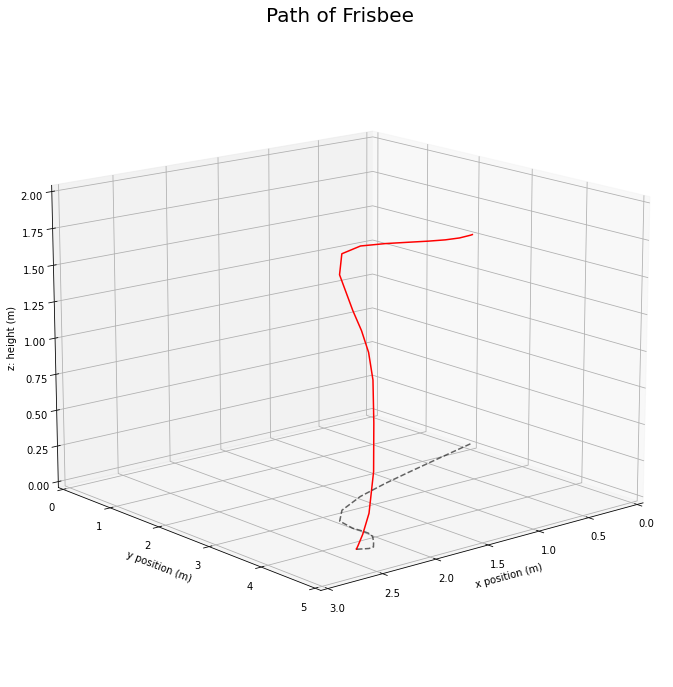

In [110]:
# Plotting
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111,projection='3d')

# this plots the results of .compute_trajectory with the 'shadow' along the ground
ax.plot(xR, yR, zR, color='red') 
ax.plot(xR, yR, 0, color='black', linestyle = 'dashed', alpha = 0.6) 

#ax.set_title('Path of Frisbee') 
# a more explicit way to set labels
ax.set_xlabel('x position (m)', fontsize = 10)
ax.set_ylabel('y position (m)', fontsize = 10)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('z: height (m)', fontsize = 10, rotation = 90)
ax.set_title('Path of Frisbee', fontsize = 20)

ax.set_xlim(0,xMax)
ax.set_ylim(0,yMax)
ax.set_zlim(0,zMax)
ax.view_init(elev=15., azim=50)

# Commented out savefig for when I'm ready to save the plot for the lecture notes.
# plt.savefig('images/generalcoords.png')
plt.show()